# Detecção de Raças de Cachorros utilizando Redes Neurais

## Importações

### Importando biblioteca

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


### Importando Dataset

In [30]:
folder_path = "C:\\Users\\amand\\Downloads\\low-resolution\\low-resolution"

list_images = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            
            file_path = os.path.join(subfolder_path, file)
            image_about = {}
            breed = subfolder.split("-")[-1]
            image_about["breed"] = breed
            image_about["filename"] = file
            image_about["path_file"] = file_path
            list_images.append(image_about)

df_images = pd.DataFrame.from_records(list_images)

In [31]:
df_images

,breed,filename,path_file
0,Shiba_Dog,n100001.jpeg,C:\Users\amand\Downloads\low-resolution\low-re...
1,Shiba_Dog,n100002.jpeg,C:\Users\amand\Downloads\low-resolution\low-re...
2,Shiba_Dog,n100003.jpeg,C:\Users\amand\Downloads\low-resolution\low-re...
3,Shiba_Dog,n100004.jpg,C:\Users\amand\Downloads\low-resolution\low-re...
4,Shiba_Dog,n100005.jpg,C:\Users\amand\Downloads\low-resolution\low-re...
...,...,...,...
70427,papillon,n170756.jpeg,C:\Users\amand\Downloads\low-resolution\low-re...
70428,papillon,n170757.jpeg,C:\Users\amand\Downloads\low-resolution\low-re...
70429,papillon,n170758.jpeg,C:\Users\amand\Downloads\low-resolution\low-re...
70430,papillon,n170759.jpeg,C:\Users\amand\Downloads\low-resolution\low-re...


### Análise Exploratória de Dados

In [32]:
# counting images number of each breed of dog

# 130 breeds

df2 = df_images.groupby(['breed'])['breed'].count()

df2

breed
Afghan_hound                       222
African_hunting_dog                211
Airedale                           200
American_Staffordshire_terrier     216
Appenzeller                        234
                                  ... 
toy_poodle                        2925
toy_terrier                        237
vizsla                             210
whippet                            234
wire_haired_fox_terrier            226
Name: breed, Length: 130, dtype: int64

##

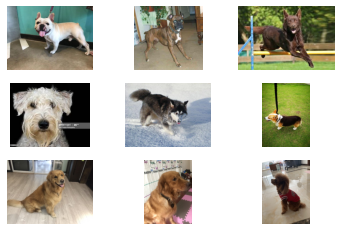

In [40]:
df = df_images.sample(n=9)
count = 0

for index, row in df.iterrows():
    image = Image.open(row["path_file"])

    # Exibir a imagem
    plt.subplot(3, 3, count + 1)
    plt.imshow(image)
    plt.axis('off')
    count += 1
